In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
churn = pd.read_csv("BankChurners.csv")
churn.head()
churn.info()
churn.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [7]:
churn['churn'] = churn['Attrition_Flag'].map({
    'Existing Customer': 0,
    'Attrited Customer': 1
})

churn['churn'].value_counts(normalize=True) * 100


churn
0    83.934038
1    16.065962
Name: proportion, dtype: float64

In [9]:
stress_features = [
    'Avg_Utilization_Ratio',   # Credit pressure
    'Total_Revolving_Bal',     # Debt accumulation
    'Months_Inactive_12_mon',  # Behavioral withdrawal
    'Total_Trans_Ct',          # Reduced engagement
    'Total_Trans_Amt'          # Reduced financial activity
]
churn.groupby('churn')[stress_features].mean()


,Avg_Utilization_Ratio,Total_Revolving_Bal,Months_Inactive_12_mon,Total_Trans_Ct,Total_Trans_Amt
churn,,,,,
0,0.296412,1256.604118,2.273765,68.672588,4654.655882
1,0.162475,672.822987,2.693301,44.933620,3095.025814


In [10]:
churn.groupby('churn')[stress_features].median()


,Avg_Utilization_Ratio,Total_Revolving_Bal,Months_Inactive_12_mon,Total_Trans_Ct,Total_Trans_Amt
churn,,,,,
0,0.211,1364.0,2.0,71.0,4100.0
1,0.000,0.0,3.0,43.0,2329.0


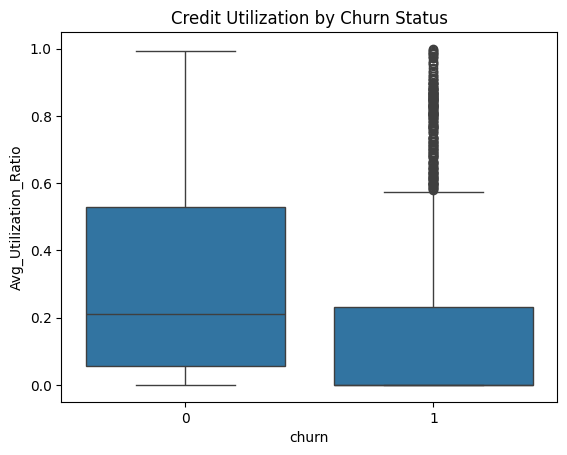

In [11]:
sns.boxplot(x='churn', y='Avg_Utilization_Ratio', data=churn)
plt.title("Credit Utilization by Churn Status")
plt.show()


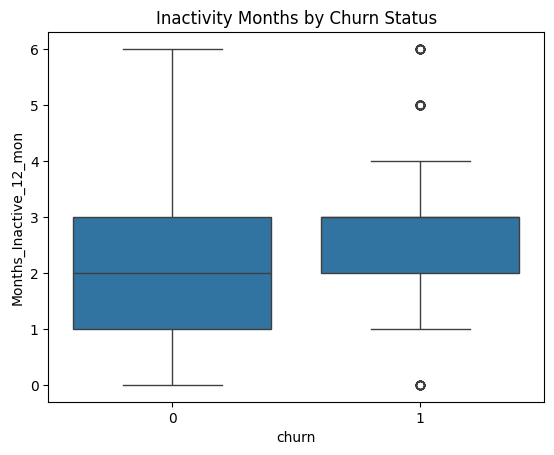

In [12]:
sns.boxplot(x='churn', y='Months_Inactive_12_mon', data=churn)
plt.title("Inactivity Months by Churn Status")
plt.show()


In [14]:
churn['credit_stress_score'] = (
    (churn['Avg_Utilization_Ratio'] > 0.7).astype(int) +
    (churn['Total_Revolving_Bal'] > churn['Total_Revolving_Bal'].median()).astype(int) +
    (churn['Months_Inactive_12_mon'] >= 3).astype(int)
)
churn.groupby('churn')['credit_stress_score'].mean()


churn
0    1.076471
1    0.955747
Name: credit_stress_score, dtype: float64